In [2]:
from BB2FAS_EAS import plot
import pandas as pd
import os.path
import matplotlib.pyplot as plt
import matplotlib.style
import matplotlib as mpl
import numpy as np
from BB2FAS_EAS import FREQ


In [3]:
robin=pd.read_csv("/Users/sungbae/FAS/Robin/Robin_FAS.csv",index_col=0)

In [4]:
stat_data=robin.loc['0200e1e']

In [5]:
stat_data

,component,FAS_0.1,FAS_0.10722672220103231,FAS_0.11497569953977356,FAS_0.12328467394420663,FAS_0.1321941148466029,FAS_0.1417474162926805,FAS_0.1519911082952934,FAS_0.16297508346206444,FAS_0.17475284000076838,...,FAS_53.366992312063125,FAS_57.2236765935022,FAS_61.35907273413176,FAS_65.79332246575683,FAS_70.54802310718645,FAS_75.64633275546291,FAS_81.11308307896873,FAS_86.97490026177834,FAS_93.26033468832199,FAS_100.0
station,,,,,,,,,,,,,,,,,,,,,
0200e1e,0,0.000253,0.000401,0.000559,0.000749,0.001077,0.001428,0.001777,0.002126,0.002449,...,0.000009,0.000006,4.616667e-06,3.664506e-06,3.111139e-06,2.771892e-06,2.593039e-06,2.473698e-06,2.176204e-06,1.551767e-06
0200e1e,90,0.000229,0.000259,0.000292,0.000325,0.000350,0.000377,0.000411,0.000451,0.000503,...,0.000003,0.000002,8.689205e-07,6.469897e-07,5.379289e-07,4.719103e-07,4.325839e-07,4.018699e-07,3.529066e-07,2.595951e-07


In [8]:
fas_ns=stat_data.loc[stat_data.component==0].values[0][1:]*100*9.81
fas_ew=stat_data.loc[stat_data.component==90].values[0][1:]*100*9.81

In [63]:
len(fas_ns)

100

In [9]:
fas_freqs=[float(x.split("FAS_")[1]) for x in stat_data.columns.values[1:]]
len(fas_freqs)

100

In [31]:




def plot(fas_ns_csv,fas_ew_csv, eas_csv,eas_interp_csv,robin_ns,robin_ew,robin_freqs):
    ns_df = pd.read_csv(fas_ns_csv, delim_whitespace=True, header=3, index_col=None)
    ew_df = pd.read_csv(fas_ew_csv, delim_whitespace=True, header=3, index_col=None)
    ns_df = ns_df[ns_df['freq']!=0] #remove freq = 0
    ew_df = ew_df[ew_df['freq']!=0]

    eas_df = pd.read_csv(eas_csv, header=0,index_col=0,sep=" ")
    eas_interp_df = pd.read_csv(eas_interp_csv, header=0, index_col=0,sep=" ")

    freq=ns_df['freq'].values
    print(len(freq))
    fas_ns=ns_df['fas'].values
    fas_ew=ew_df['fas'].values
    eas=eas_df['EAS'].values
    eas_smoothing=eas_df['EAS_smooth'].values
    eas_interp=eas_interp_df['EAS_interp'].values


    statname=os.path.basename(fas_ns_csv).split(".")[0]
    outpath=os.path.abspath(os.path.dirname(fas_ns_csv))

    #plot

    mpl.rcParams['lines.linewidth'] = 0.4
    mpl.rcParams['lines.markersize'] = np.sqrt(2)
    #plt.rcParams["figure.figsize"] = (6,4)
    plt.rcParams['figure.dpi']=300
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_xlim(0.01,100)
    ax.set_ylim(0.00001,1000)
    ax.set_xscale("log")
    ax.set_yscale("log")

    ax.plot(freq,fas_ns,'bo') #NS
    ax.plot(freq,fas_ew,'r*') #EW
    
    ax.plot(robin_freqs,robin_ns,"y.")
    ax.plot(robin_freqs,robin_ew,"kx")
    #ax.plot(freq, eas, 'y')  # EAS
    #ax.plot(freq,eas_smoothing, 'k-') #Smoothed EAS
    ax.plot(FREQ,eas_interp,'-',c='#555555') #Smoothed and Interpolated

    ax.set_xlabel('Frequency (Hz)')
    ax.set_ylabel('Fourier Amplitude (cm/s)')
    #ax.legend(labels=('NS','EW','EAS','Smoothed EAS','Smoothed and Interpolated'),loc='lower left')
    ax.legend(labels=('NS','EW',"rNS",'rEW','Smoothed EAS'),loc='lower left')
    ax.set_title('FAS/EAS: {}'.format(statname))
    plt.show()
    #plt.savefig(os.path.join(outpath,statname+".png"),dpi=500)
    plt.close(fig)

4095


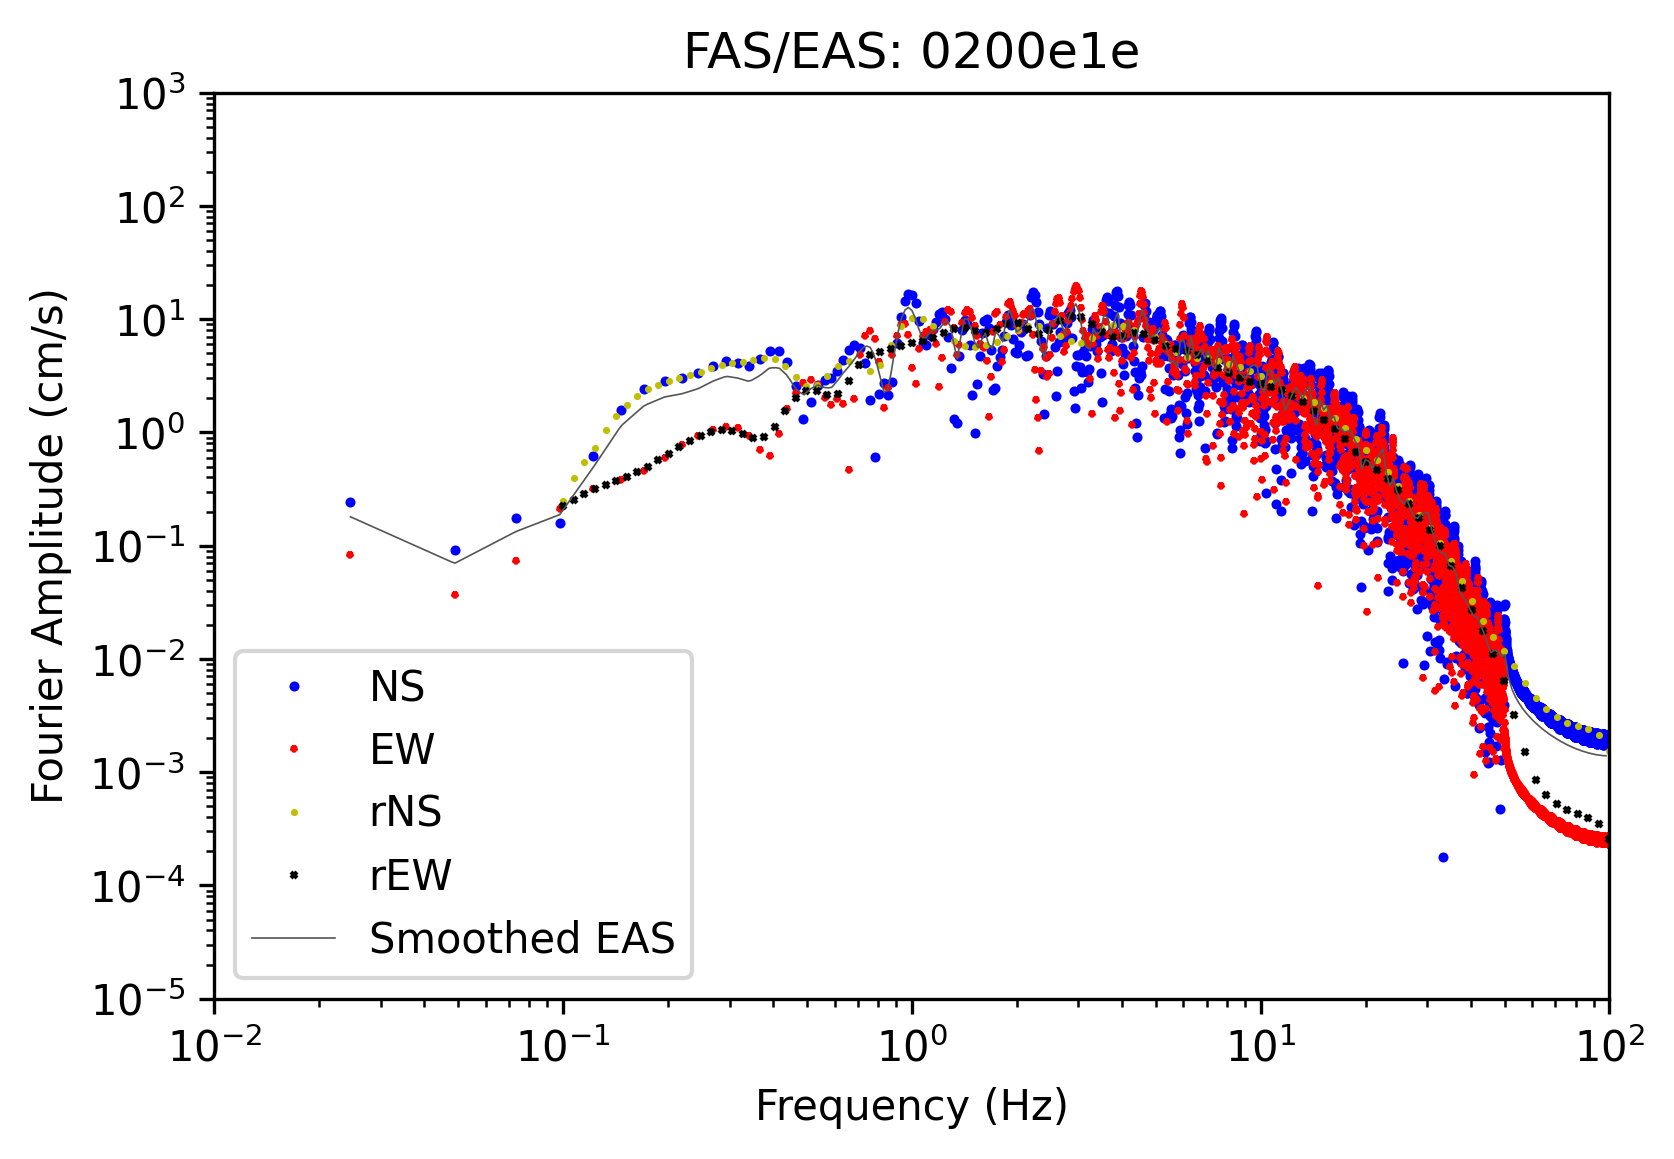

In [32]:
plot("/Users/sungbae/FAS/Output/Hossack/0200e1e.bbp.smc8.NS.no_smooth.fs.col","~/FAS/Output/Hossack/0200e1e.bbp.smc8.EW.no_smooth.fs.col","~/FAS/Output/Hossack/0200e1e.bbp.EAS.csv","~/FAS/Output/Hossack/0200e1e.bbp.EAS_interp.csv",fas_ns,fas_ew,fas_freqs)